In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\saisa\Downloads\Dataset\Dataset\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 143226 files belonging to 37 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato

In [5]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

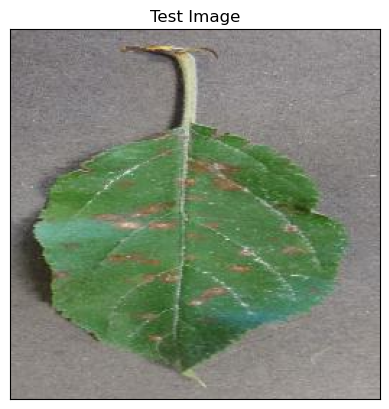

In [7]:
#Test Image Visualization
import cv2
image_path = r"C:\Users\saisa\OneDrive\Desktop\Plant Disease Detection System for Sustainable Agriculture\test\AppleCedarRust2.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [11]:
print(predictions)

[[2.6175653e-06 9.6046202e-09 9.9962783e-01 5.3705101e-08 9.0895513e-09
  9.8195915e-06 3.7970505e-11 2.1728354e-04 2.9001765e-11 3.1475938e-08
  3.6074195e-12 2.2027964e-06 3.7669573e-10 7.1239564e-10 5.6158719e-08
  1.2721774e-06 1.0523269e-08 1.9728059e-05 3.8862498e-07 1.2143043e-08
  1.8648381e-06 4.2706599e-08 3.7859732e-10 2.7260447e-10 1.4392826e-08
  1.0765181e-08 5.2091623e-11 6.8263209e-05 4.5996629e-05 2.7981520e-07
  4.8480664e-09 8.2547267e-08 1.2493779e-09 2.0689429e-06 2.3305873e-08
  3.9590979e-08 2.7632629e-08]]


In [13]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


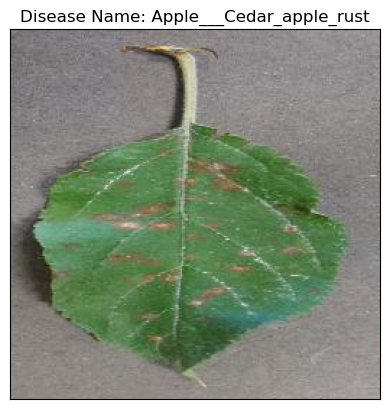

In [15]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()